# Capstone Assignment :1
## OpenCV augmentation

### In this notebook :
#### - Importing OpenCV
#### - Reading Data using tqdm module
#### - EDA of Data
#### - Augmentations
#### - Listing
#### - Writing files back to disk


In [68]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import cv2                          ### Importing OpenCV
import matplotlib.pyplot as plt
import os


In [3]:
# Reading Data from csv file

df_train = pd.read_csv("./capstone/labels.csv")

df_train = df_train[:]
df_train.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [4]:
ax=pd.value_counts(df_train['breed'],ascending=True).plot(kind='barh',
                                                       fontsize="40",
                                                       title="Class Distribution",
                                                       figsize=(50,100))
ax.set(xlabel="Images per class", ylabel="Classes")
ax.xaxis.label.set_size(40)
ax.yaxis.label.set_size(40)
ax.title.set_size(60)

In [5]:
def plot_images(images, classes):
    assert len(images) == len(classes) == 9
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3,figsize=(60,60),sharex=True)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
   
    for i, ax in enumerate(axes.flat):
        # Plot image.
        
        ax.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB).reshape(img_width,img_height,3), cmap='hsv')    
        xlabel = "Breed: {0}".format(classes[i])
    
        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)
        ax.xaxis.label.set_size(60)
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    
    plt.show()

In [6]:
# Reading Images from disk using tqdm

img_width=256
img_height=256
images=[]
classes=[]
#load training images
for f, breed in tqdm(df_train.values):
    img = cv2.imread('train/{}.jpg'.format(f))
    classes.append(breed)
    images.append(cv2.resize(img, (img_width, img_height)))

100%|██████████| 10222/10222 [00:35<00:00, 288.29it/s]


Images to show: 9
Classes to show: 9


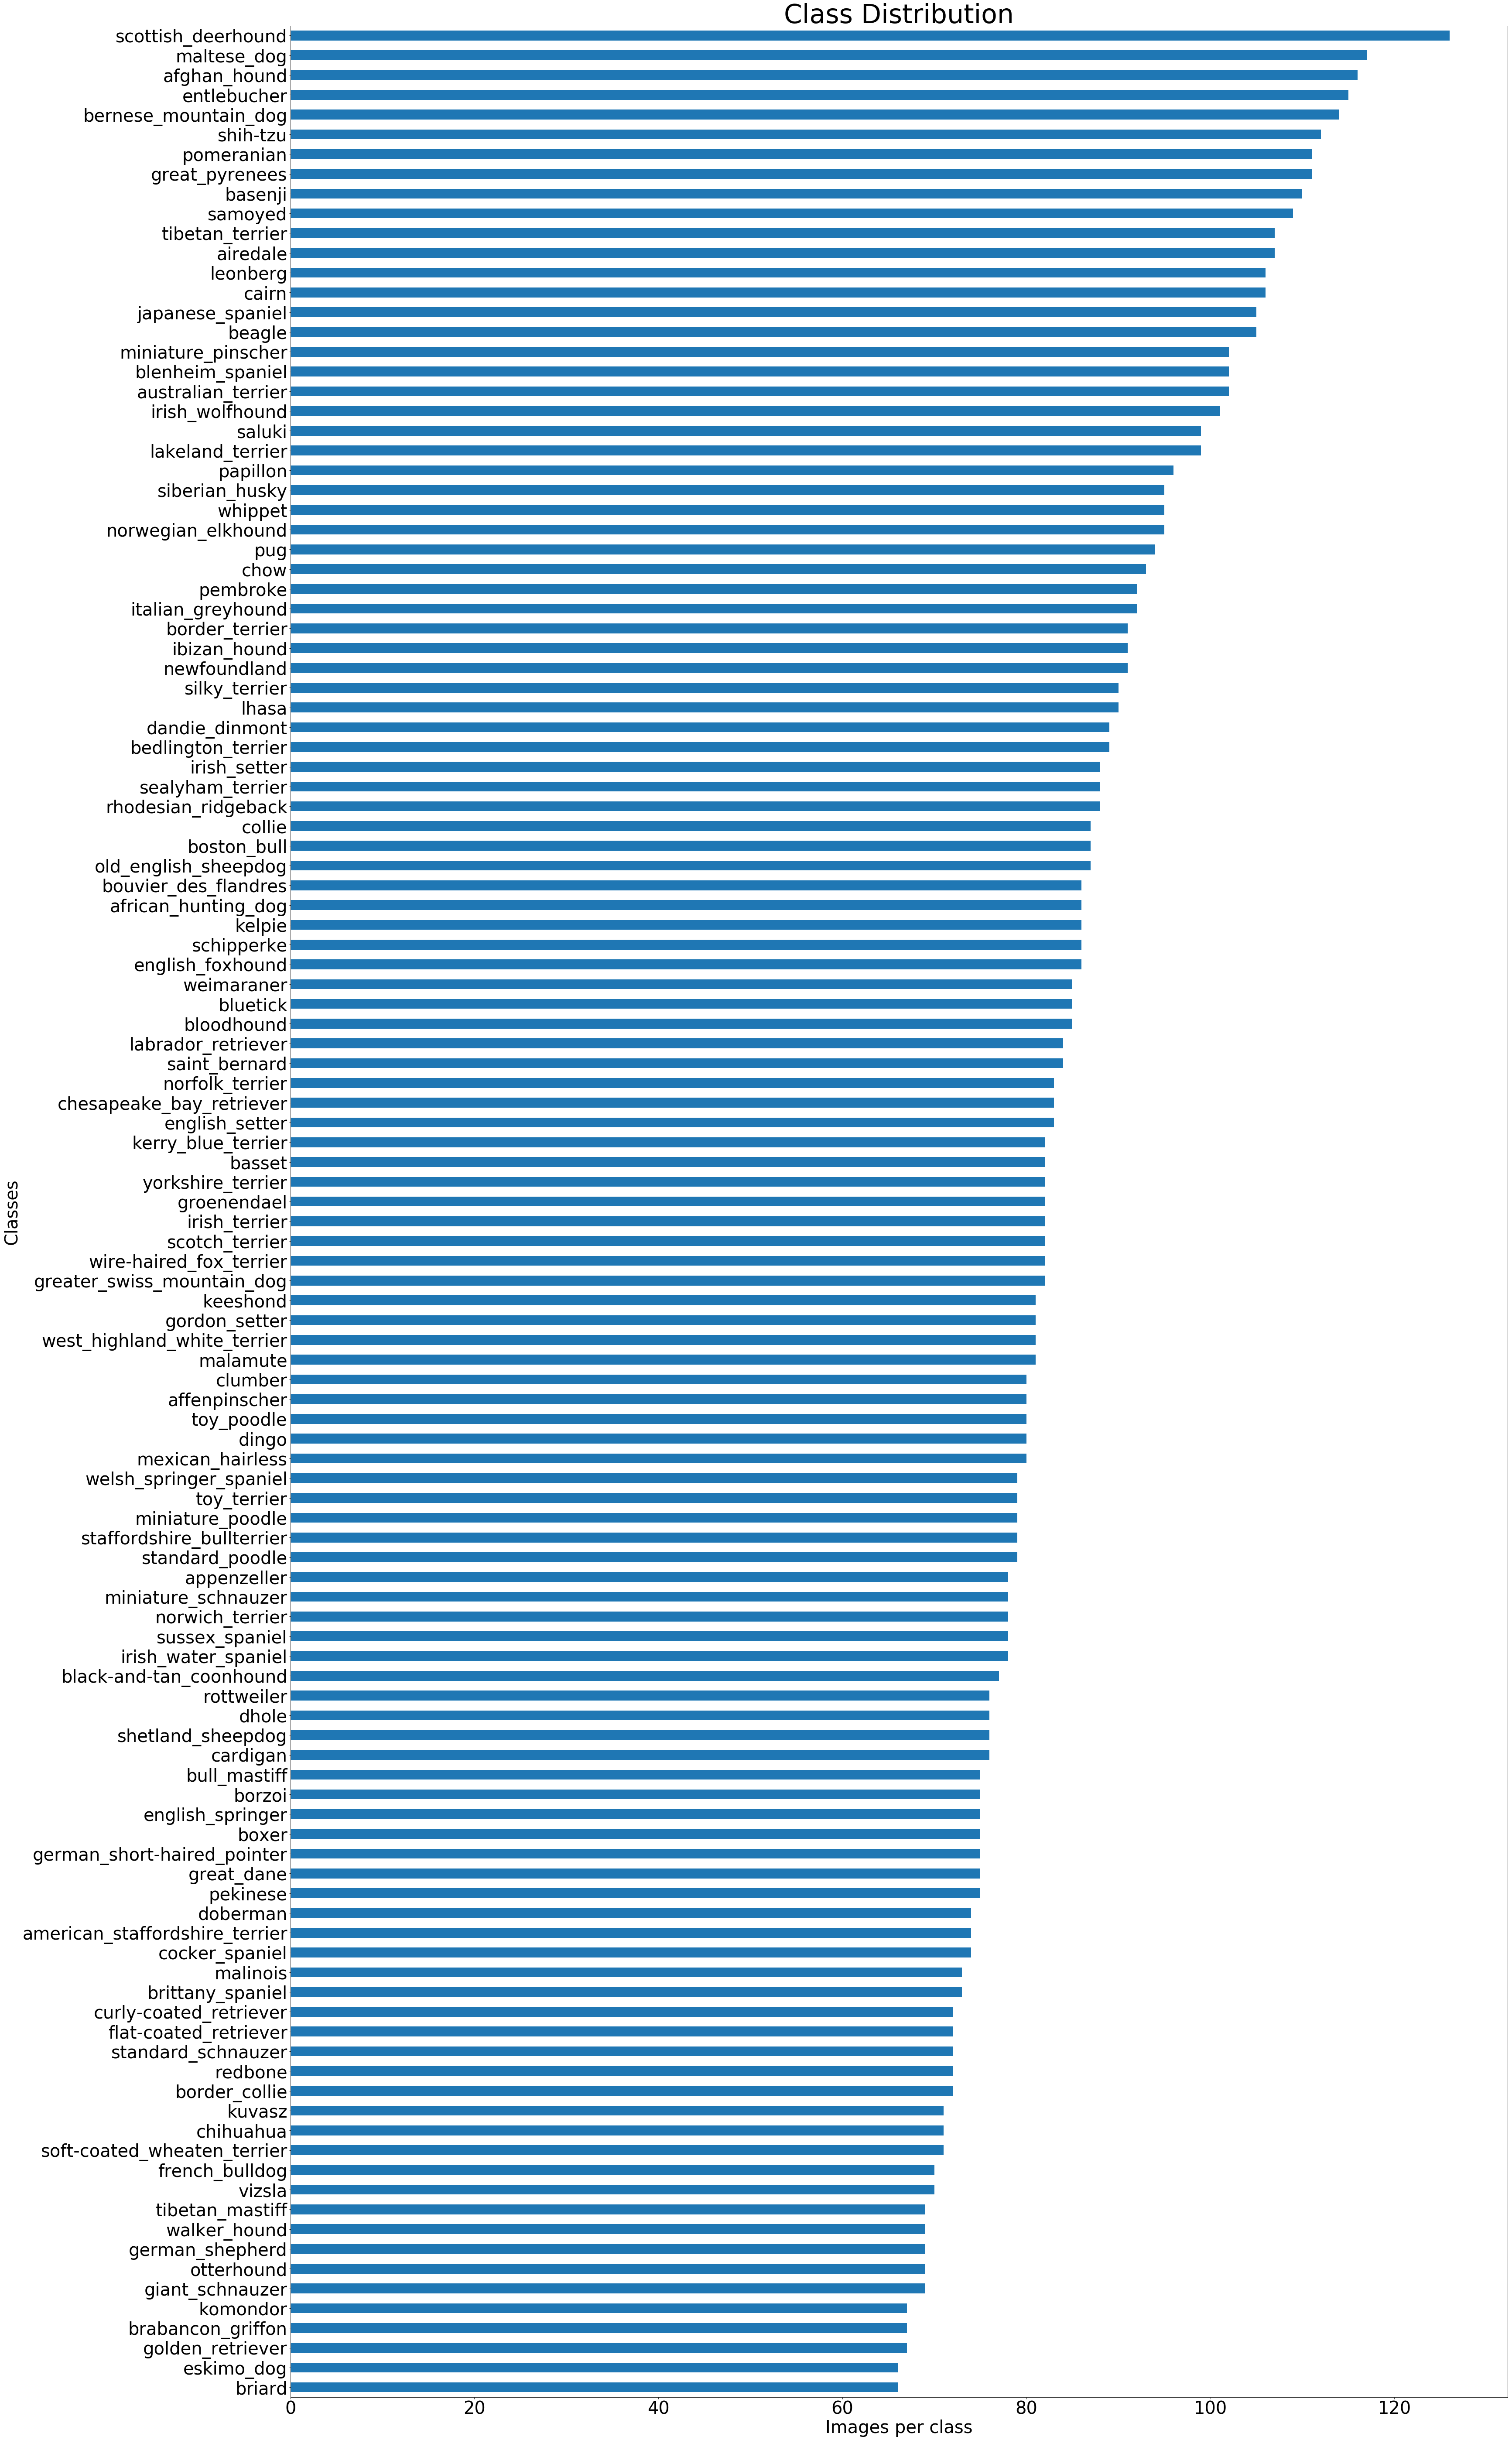

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [7]:
# select random images

random_numbers = [np.random.randint(0, len(images)) for p in range(0,9)]
images_to_show = [images[i] for i in random_numbers]
classes_to_show = [classes[i] for i in random_numbers]
print("Images to show: {0}".format(len(images_to_show)))
print("Classes to show: {0}".format(len(classes_to_show)))

#plot the images

plot_images(images_to_show, classes_to_show)

In [8]:
all_inputs = []
breed = []

### From BGR to RGB

In [9]:
inputs = []
for i in range(10222):
     inputs.append(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    

# Data Augmentation

### Flip left right

In [10]:
random_numbers = [np.random.randint(0, len(images)) for p in range(0,5000)]

In [11]:
flip_inputlr = []
flip_classlr =[]
for i in random_numbers:
    flip_inputlr.append(cv2.flip(inputs[i],1))
    flip_classlr.append(classes[i])

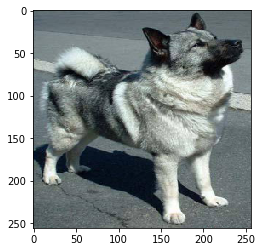

In [12]:
plt.imshow(flip_inputlr[99])
plt.show()


### Flip up and down

In [14]:
random_numbers1 = [np.random.randint(0, len(images)) for p in range(0,5000)]

In [15]:
flip_inputup = []
flip_classup = []
for i in random_numbers1:
    flip_inputup.append(cv2.flip(inputs[i],0))
    flip_classup.append(classes[i])

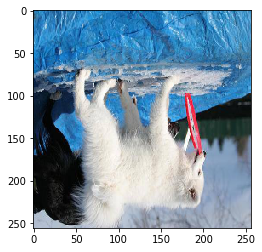

In [16]:
plt.imshow(flip_inputup[499])
plt.show()

### Blur

In [17]:
random_numbers2 = [np.random.randint(0, len(images)) for p in range(0,1000)]

In [18]:
blur_input = []
blur_class = []
for i in random_numbers2:
    blur_input.append(cv2.blur(inputs[i],(5,5)))
    blur_class.append(classes[i])

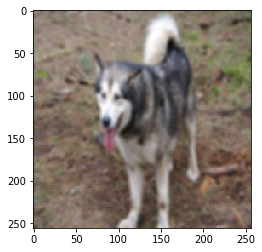

In [19]:
plt.imshow(blur_input[487])
plt.show()

### GaussaianBlur

In [20]:
random_numbers3 = [np.random.randint(0, len(images)) for p in range(0,1000)]

In [21]:
GaussianBlur_input =[]
GaussianBlur_class =[]
for i in random_numbers3:
    GaussianBlur_input.append(cv2.GaussianBlur(inputs[i],(5,5),0))
    GaussianBlur_class.append(classes[i])

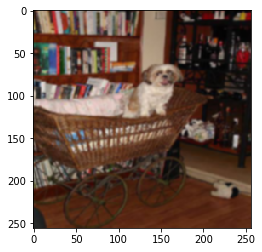

In [22]:
plt.imshow(GaussianBlur_input[487])
plt.show()

### Median Blur

In [23]:
random_numbers4 = [np.random.randint(0, len(images)) for p in range(0,1000)]

In [24]:
MedianBlur_input =[]
MedianBlur_class =[]
for i in random_numbers4:
    MedianBlur_input.append(cv2.medianBlur(inputs[i],5))
    MedianBlur_class.append(classes[i])

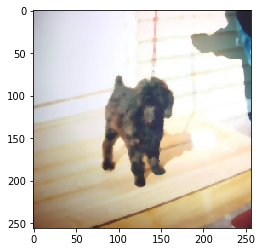

In [25]:
plt.imshow(MedianBlur_input[487])
plt.show()

### Bilateral blur

In [26]:
random_numbers4 = [np.random.randint(0, len(images)) for p in range(0,1000)]

In [27]:
BilateralFilter_input =[]
BilateralFilter_class =[]
for i in random_numbers4:
    BilateralFilter_input.append(cv2.bilateralFilter(inputs[i],9,75,75))
    BilateralFilter_class.append(classes[i])


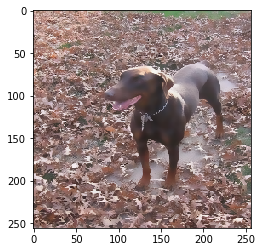

In [28]:
plt.imshow(BilateralFilter_input[487])
plt.show()

### Erosion

In [29]:
random_numbers5 = [np.random.randint(0, len(images)) for p in range(0,1000)]

In [30]:
kernel_rect = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
kernel_ellipse = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
kernel_crossed = cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))

In [31]:
Erosion_input =[]
Erosion_class =[]
for i in random_numbers5:
    Erosion_input.append(cv2.erode(inputs[i],kernel_rect,iterations=1))
    Erosion_class.append(classes[i])

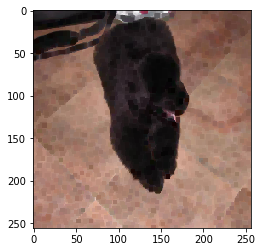

In [32]:
plt.imshow(Erosion_input[487])
plt.show()

### Dilation

In [33]:
random_numbers6 = [np.random.randint(0, len(images)) for p in range(0,1000)]

In [34]:
Dilate_input =[]
Dilate_class =[]
for i in random_numbers6:
    Dilate_input.append(cv2.dilate(inputs[i],kernel_ellipse,iterations=1))
    Dilate_class.append(classes[i])

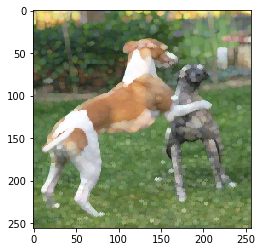

In [35]:
plt.imshow(Dilate_input[87])
plt.show()

### Opening

In [36]:
random_numbers7 = [np.random.randint(0, len(images)) for p in range(0,1000)]

In [37]:
Opening_input =[]
Opening_class =[]
for i in random_numbers7:
    Opening_input.append(cv2.morphologyEx(inputs[i],cv2.MORPH_OPEN,kernel_crossed))
    Opening_class.append(classes[i])

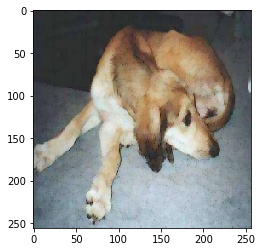

In [38]:
plt.imshow(Opening_input[87])
plt.show()

### Closing

In [39]:
random_numbers8 = [np.random.randint(0, len(images)) for p in range(0,1000)]

In [40]:
Closing_input = []
Closing_class = []
for i in random_numbers8:
    Closing_input.append(cv2.morphologyEx(inputs[i],cv2.MORPH_CLOSE,kernel_ellipse))
    Closing_class.append(classes[i])
    

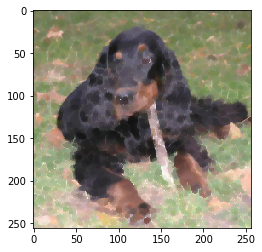

In [41]:
plt.imshow(Closing_input[87])
plt.show()

### laplacian

In [42]:
random_numbers9 = [np.random.randint(0, len(images)) for p in range(0,1000)]

In [43]:
Laplacian_input = []
Laplacian_class = []
for i in random_numbers9:
    Laplacian_input.append(cv2.morphologyEx(inputs[i],cv2.MORPH_CLOSE,kernel_ellipse))
    Laplacian_class.append(classes[i])

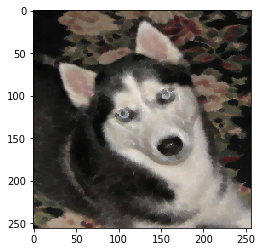

In [44]:
plt.imshow(Laplacian_input[87])
plt.show()

### RGB TO GBR AND BRG

In [45]:
blue =[]
green =[]
red=[]
for i in range(10222):
    b,g,r = cv2.split(inputs[i])
    blue.append(b)
    green.append(g)
    red.append(r)

In [46]:
images_gbr =[]
images_gbr_class =[]

random_numbers10 = [np.random.randint(0, len(images)) for p in range(0,5000)]
for i in random_numbers10:
    images_gbr.append(cv2.merge([green[i],blue[i],red[i]]))
    images_gbr_class.append(classes[i])


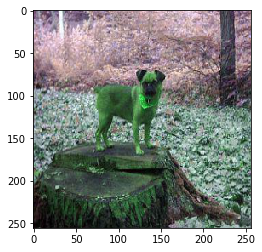

In [47]:
plt.imshow(images_gbr[76])
plt.show()

In [48]:
images_brg =[]
images_brg_class =[]

random_numbers11 = [np.random.randint(0, len(images)) for p in range(0,5000)]
for i in random_numbers11:
    images_brg.append(cv2.merge([blue[i],red[i],green[i]]))
    images_brg_class.append(classes[i])

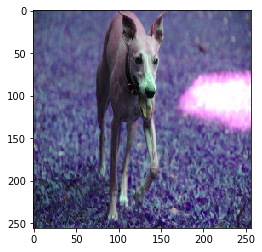

In [49]:
plt.imshow(images_brg[76])
plt.show()

In [50]:
all_inputs=[]
breeds =[]


### Appending all images : Normal and augmented

In [51]:
all_inputs.append(inputs)
all_inputs.append(flip_inputlr)
all_inputs.append(flip_inputup)
all_inputs.append(blur_input)
all_inputs.append(GaussianBlur_input)
all_inputs.append(MedianBlur_input)
all_inputs.append(BilateralFilter_input)
all_inputs.append(Erosion_input)
all_inputs.append(Dilate_input)
all_inputs.append(Opening_input)
all_inputs.append(Closing_input)
all_inputs.append(Laplacian_input)
all_inputs.append(images_gbr)
all_inputs.append(images_brg)



In [52]:
breeds.append(classes)
breeds.append(flip_classlr)
breeds.append(flip_classup)
breeds.append(blur_class)
breeds.append(GaussianBlur_class)
breeds.append(MedianBlur_class)
breeds.append(BilateralFilter_class)
breeds.append(Erosion_class)
breeds.append(Dilate_class)
breeds.append(Opening_class)
breeds.append(Closing_class)
breeds.append(Laplacian_class)
breeds.append(images_gbr_class)
breeds.append(images_brg_class)

In [67]:
breeds[0][1]

'dingo'

In [87]:
class_wise_name = os.listdir('./capstone/class_wise')

In [88]:
os.mkdir('./capstone/aug')

FileExistsError: [Errno 17] File exists: './capstone/aug'

In [89]:
for i in range(120):
    os.mkdir('./capstone/aug/'+str(class_wise_name[i]))

FileExistsError: [Errno 17] File exists: './capstone/aug/silky_terrier'

In [90]:
for j in range(14):
    for i in range(len(breeds[j])):
        cv2.imwrite('./capstone/aug/'+breeds[j][i]+'/as'+str(i)+'.jpg',all_inputs[j][i])